## Computer vision libraries in PyTorch

* `torchvision` - base domain library for pytorch computer vision.
* `torchvision.datasets` - get datasets and data loading functions for computer vision here.
* `torchvision.models` - get pretrained computer vision models that you can leverage for your own problems.                        
* `torchvision.transforms` - functions for manipulating your vision data (images) to be suitable for use with an ML model.  
* `torch.utils.data.Dataset` - Base dataset class for Pytorch
* `torch.utils.data.DataLoader` - Creates a Python iterable over a dataset
                                                                                                

In [1]:
# Import PyTorch
import torch
from torch import nn

# Import torchvision
import torchvision
from torchvision import datasets
from torchvision import transforms
from torchvision.transforms import ToTensor

# Import matplotlib for visualization
import matplotlib.pyplot as plt

# check version
print(torch.__version__)
print(torchvision.__version__)

device = "cuda" if torch.cuda.is_available() else "cpu"
device

2.2.0+cu121
0.17.0+cu121


'cuda'

## 1. Getting a dataset


In [2]:
# Setup training data
from torchvision import datasets
train_data = datasets.FashionMNIST(
    root="data",
    train=True, # Do we wnat the training dataset?
    download=True,
    transform=torchvision.transforms.ToTensor(), # how do we want to transform the data?
    target_transform=None # How do we want to transoform the labels/targets?
)

test_data = datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor(),
    target_transform=None
)

In [3]:
len(train_data), len(test_data), len(train_data[0]), len(test_data[0])

(60000, 10000, 2, 2)

In [4]:
len(test_data.targets)

10000

In [5]:
image, label = train_data[0]
image, label

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0039, 0.0000, 0.0000, 0.0510,
           0.2863, 0.0000, 0.0000, 0.0039, 

In [6]:
 class_names = train_data.classes
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [7]:
class_to_idx = train_data.class_to_idx
class_to_idx

{'T-shirt/top': 0,
 'Trouser': 1,
 'Pullover': 2,
 'Dress': 3,
 'Coat': 4,
 'Sandal': 5,
 'Shirt': 6,
 'Sneaker': 7,
 'Bag': 8,
 'Ankle boot': 9}

In [8]:
train_data.targets

tensor([9, 0, 0,  ..., 3, 0, 5])

In [9]:
# Check input and output shapes of data
print(f"Image shape: {image.shape} -> [color_channels, height, width]")
print(f"Image label: {class_names[label]}")

Image shape: torch.Size([1, 28, 28]) -> [color_channels, height, width]
Image label: Ankle boot


# 1.2 Visualizing our data

Image shape:torch.Size([1, 28, 28])


(-0.5, 27.5, 27.5, -0.5)

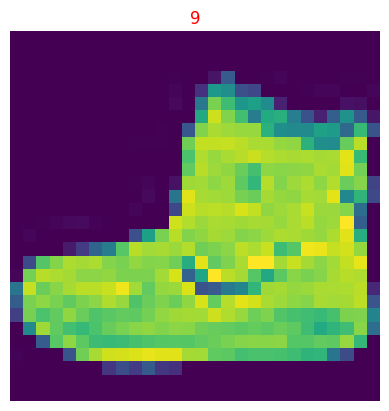

In [10]:
  import matplotlib.pyplot as plt
image, label = train_data[0]
print(f"Image shape:{image.shape}")

plt.imshow(image.squeeze())
plt.title(label, color='red');
plt.axis(False)

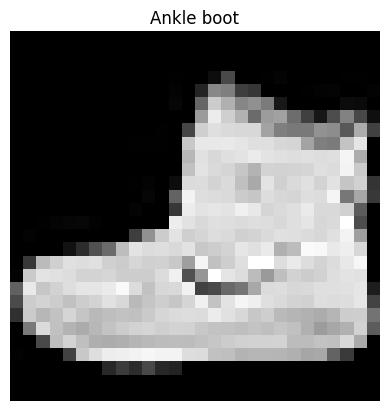

In [11]:
plt.imshow(image.squeeze(), cmap='gray')
plt.title(class_names[label]);
plt.axis(False);

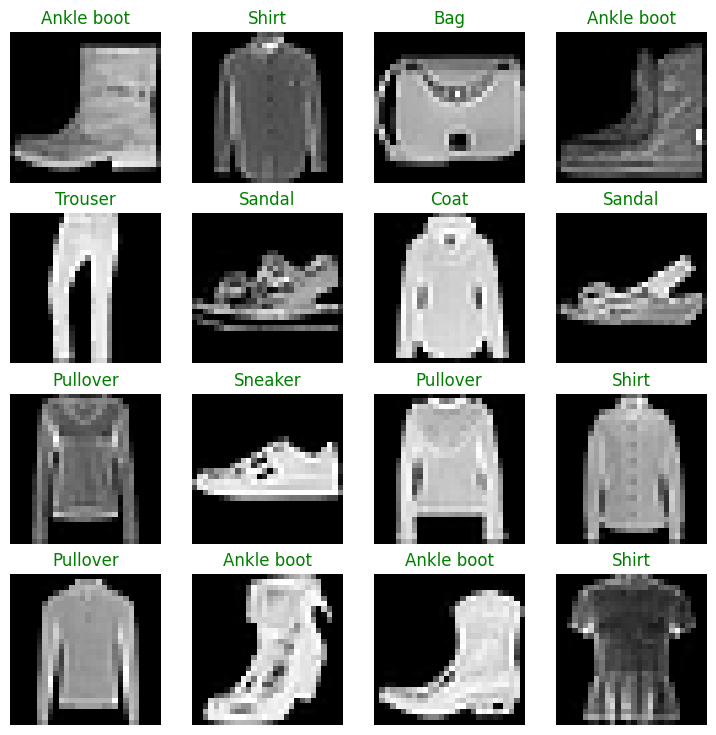

In [12]:
# Plot more images
torch.manual_seed(42)
fig = plt.figure(figsize=(9,9))
rows, cols = 4, 4
for i in range(1, rows*cols+1): # 4*4+1 = 17
    random_idx = torch.randint(0, len(train_data), size=[1]).item()
    # print(random_idx)
    img, label = train_data[random_idx]
    fig.add_subplot(rows, cols, i)
    plt.imshow(img.squeeze(), cmap="gray")
    plt.title(class_names[label], color='green')
    plt.axis(False);

In [13]:
from torch.utils.data import DataLoader

# Setup the batch size hyperparameter
BATCH_SIZE = 32

# Turn datasets into iterables (batches)
train_dataloader = DataLoader(dataset=train_data,
                             batch_size=BATCH_SIZE,
                             shuffle=True)

test_dataloader = DataLoader(dataset=test_data,
                            batch_size=BATCH_SIZE,
                            shuffle=False)

train_dataloader, test_dataloader

(<torch.utils.data.dataloader.DataLoader at 0x2312908ade0>,
 <torch.utils.data.dataloader.DataLoader at 0x231228aa750>)

In [14]:
print(f"DataLoaders: {train_dataloader, test_dataloader}")
print(f"Length of train_dataloader: {len(train_dataloader)} batches of {BATCH_SIZE}...")
print(f"Length of test_dataloader: {len(test_dataloader)} batches of {BATCH_SIZE}...")

DataLoaders: (<torch.utils.data.dataloader.DataLoader object at 0x000002312908ADE0>, <torch.utils.data.dataloader.DataLoader object at 0x00000231228AA750>)
Length of train_dataloader: 1875 batches of 32...
Length of test_dataloader: 313 batches of 32...


In [15]:
# checking what's inside the training dataloader
train_features_batch, train_labels_batch = next(iter(train_dataloader))
train_features_batch.shape, train_labels_batch.shape

(torch.Size([32, 1, 28, 28]), torch.Size([32]))

Image size: torch.Size([1, 28, 28])
Label: 6, label size: torch.Size([])


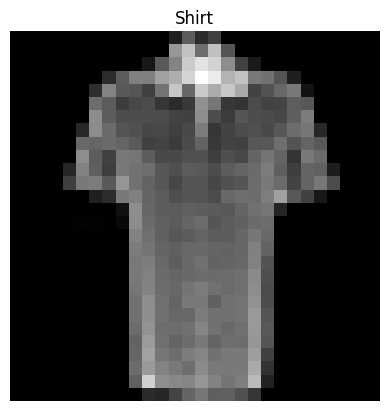

In [16]:
# Visualzing a sample
torch.manual_seed(42)
random_idx = torch.randint(0, len(train_features_batch), size=[1]).item()
img, label = train_features_batch[random_idx], train_labels_batch[random_idx]
plt.imshow(img.squeeze(), cmap='gray')
plt.title(class_names[label])
plt.axis(False)

print(f"Image size: {img.shape}")
print(f"Label: {label}, label size: {label.shape}")

# 3. Model 0: Building a baseline model
* Start simply and add complexity when necessary

In [17]:
# Create a flatten layer
flatten_model = nn.Flatten()

# Get a single sample
x = train_features_batch[0]

# Flatten the sample
output = flatten_model(x) # perform forward pass

print(f"Shape before flattening: {x.shape}")
print(f"Shape after flattening: {output.shape}")

Shape before flattening: torch.Size([1, 28, 28])
Shape after flattening: torch.Size([1, 784])


In [18]:
from torch import nn
class FashionMNISTModelV0(nn.Module):
    def __init__(self,
                input_shape: int,
                hidden_units: int,
                output_shape: int):
        super().__init__()
        self.layer_stack = nn.Sequential(
            nn.Flatten(),
            nn.Linear(in_features=input_shape,
                     out_features=hidden_units),
            nn.Linear(in_features=hidden_units,
                     out_features=output_shape)
        )
    def forward(self, x):
        return self.layer_stack(x)

In [19]:
torch.manual_seed(42)

# Setup model with input parameters
model_0 = FashionMNISTModelV0(
    input_shape=28*28,
    hidden_units=10,
    output_shape=len(class_names) # 10
).to(device)

model_0

FashionMNISTModelV0(
  (layer_stack): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=10, bias=True)
    (2): Linear(in_features=10, out_features=10, bias=True)
  )
)

In [20]:
dummy_x = torch.rand([1, 1, 28, 28]).to(device)
model_0(dummy_x)

tensor([[-0.0315,  0.3171,  0.0531, -0.2525,  0.5959,  0.2112,  0.3233,  0.2694,
         -0.1004,  0.0157]], device='cuda:0', grad_fn=<AddmmBackward0>)

In [21]:
model_0.state_dict()

OrderedDict([('layer_stack.1.weight',
              tensor([[ 0.0273,  0.0296, -0.0084,  ..., -0.0142,  0.0093,  0.0135],
                      [-0.0188, -0.0354,  0.0187,  ..., -0.0106, -0.0001,  0.0115],
                      [-0.0008,  0.0017,  0.0045,  ..., -0.0127, -0.0188,  0.0059],
                      ...,
                      [-0.0116,  0.0273, -0.0344,  ...,  0.0176,  0.0283, -0.0011],
                      [-0.0230,  0.0257,  0.0291,  ..., -0.0187, -0.0087,  0.0001],
                      [ 0.0176, -0.0147,  0.0053,  ..., -0.0336, -0.0221,  0.0205]],
                     device='cuda:0')),
             ('layer_stack.1.bias',
              tensor([-0.0093,  0.0283, -0.0033,  0.0255,  0.0017,  0.0037, -0.0302, -0.0123,
                       0.0018,  0.0163], device='cuda:0')),
             ('layer_stack.2.weight',
              tensor([[ 0.0614, -0.0687,  0.0021,  0.2718,  0.2109,  0.1079, -0.2279, -0.1063,
                        0.2019,  0.2847],
                      [-0

In [22]:
import requests
from pathlib import Path

# Download helper functions from my github
if Path("helper_functions.py").is_file():
    print("helper_functions.py already exists, skipping download...")
else:
    print("Downloading helper_functions.py")
    request = requests.get("https://raw.githubusercontent.com/Jamshid-Ganiev/PyTorch-for-Deep-Learning/main/helper_functions.py")
    with open("helper_functions.py", "wb") as f:
        f.write(request.content)

helper_functions.py already exists, skipping download...


In [23]:
# Import accuracy metric
from helper_functions import accuracy_fn

# Loss function and optimizer
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model_0.parameters(),
                           lr=0.1)

# 3.2 Creating a function to time our experiments

Two of the main things we'll want to track are:
1. Model's performance (loss and accuracy values etc)
2. How fast it runs

In [24]:
from timeit import default_timer as timer
def print_train_time(start: float,
                    end: float,
                    device: torch.device = None):
    """Prints diff between start and end time."""
    total_time = end - start
    print(f"Train time on {device}: {total_time:.3f} seconds")
    return total_time

In [25]:
start_time = timer()
# some code......
end_time = timer()
print_train_time(start=start_time, end=end_time, device=device)

Train time on cuda: 0.000 seconds


1.6200006939470768e-05

## 3.3 creating a training loop and training a model on batches of data

In [26]:
##### If in doubt, code it out #####
from tqdm import tqdm # for progress bar

### Set the seed and start the timer
torch.manual_seed(42)
train_time_start_on_GPU = timer()

epochs = 10

# Create training nad test loop
for epoch in tqdm(range(epochs)):
    print(f"Epoch: {epoch}\n------")

    # training
    train_loss = 0

    # Add a loop to loop through the training batches
    for batch, (X, y) in enumerate(train_dataloader):
        X = X.to(device)
        y = y.to(device)
        
        model_0.train()
        # 1. Forward pass
        y_pred = model_0(X) # X_train set

        # 2. Calculate the loss (per batch)
        loss = loss_fn(y_pred, y) # y = y_train set
        train_loss += loss # accumulate train loss

        # 3. Optimizer zero grad
        optimizer.zero_grad()

        # 4. Loss Backward
        loss.backward()

        # 5. Optimizer step
        optimizer.step()

        # Print out what's happening'
        if batch % 400 == 0:
            print(f"Looked at {batch * len(X)} / {len(train_dataloader.dataset)} samples.")
            
    # Divide total train loss by length of train dataloader
    train_loss /= len(train_dataloader)

    ### Testing
    test_loss, test_acc = 0, 0
    model_0.eval()
    with torch.inference_mode():
        for X_test, y_test in test_dataloader:

            X_test = X_test.to(device)
            y_test = y_test.to(device)
            
            # 1. Forward pass
            test_pred = model_0(X_test)

            # 2. Calculate the loss & Acc
            test_loss += loss_fn(test_pred, y_test)
            
            test_acc += accuracy_fn(y_true = y_test, y_pred = test_pred.argmax(dim=1))

        # Calcualte the test loss average per batch
        test_loss /= len(test_dataloader)

        # Calculate the test acc average per batch
        test_acc /= len(test_dataloader)

    # Print out what's happenin'
    print(f"\nTrain loss: {train_loss:.4f} | Test loss: {test_loss:.4f}, Test acc: {test_acc:.4f}")

# Calculate training time
train_time_end_on_GPU = timer()
total_train_time_model_0 = print_train_time(start=train_time_start_on_GPU,
                                           end=train_time_end_on_GPU,
                                           device=str(next(model_0.parameters()).device))            

  0%|                                                                                           | 0/10 [00:00<?, ?it/s]

Epoch: 0
------
Looked at 0 / 60000 samples.
Looked at 12800 / 60000 samples.
Looked at 25600 / 60000 samples.
Looked at 38400 / 60000 samples.
Looked at 51200 / 60000 samples.


 10%|████████▎                                                                          | 1/10 [00:04<00:43,  4.85s/it]


Train loss: 0.5904 | Test loss: 0.5095, Test acc: 82.0387
Epoch: 1
------
Looked at 0 / 60000 samples.
Looked at 12800 / 60000 samples.
Looked at 25600 / 60000 samples.
Looked at 38400 / 60000 samples.
Looked at 51200 / 60000 samples.


 20%|████████████████▌                                                                  | 2/10 [00:09<00:39,  4.89s/it]


Train loss: 0.4763 | Test loss: 0.4799, Test acc: 83.1969
Epoch: 2
------
Looked at 0 / 60000 samples.
Looked at 12800 / 60000 samples.
Looked at 25600 / 60000 samples.
Looked at 38400 / 60000 samples.
Looked at 51200 / 60000 samples.


 30%|████████████████████████▉                                                          | 3/10 [00:15<00:35,  5.10s/it]


Train loss: 0.4550 | Test loss: 0.4766, Test acc: 83.4265
Epoch: 3
------
Looked at 0 / 60000 samples.
Looked at 12800 / 60000 samples.
Looked at 25600 / 60000 samples.
Looked at 38400 / 60000 samples.
Looked at 51200 / 60000 samples.


 40%|█████████████████████████████████▏                                                 | 4/10 [00:20<00:32,  5.35s/it]


Train loss: 0.4425 | Test loss: 0.4631, Test acc: 83.7460
Epoch: 4
------
Looked at 0 / 60000 samples.
Looked at 12800 / 60000 samples.
Looked at 25600 / 60000 samples.
Looked at 38400 / 60000 samples.
Looked at 51200 / 60000 samples.


 50%|█████████████████████████████████████████▌                                         | 5/10 [00:26<00:27,  5.49s/it]


Train loss: 0.4358 | Test loss: 0.4687, Test acc: 83.2668
Epoch: 5
------
Looked at 0 / 60000 samples.
Looked at 12800 / 60000 samples.
Looked at 25600 / 60000 samples.
Looked at 38400 / 60000 samples.
Looked at 51200 / 60000 samples.


 60%|█████████████████████████████████████████████████▊                                 | 6/10 [00:32<00:22,  5.57s/it]


Train loss: 0.4291 | Test loss: 0.4589, Test acc: 83.6362
Epoch: 6
------
Looked at 0 / 60000 samples.
Looked at 12800 / 60000 samples.
Looked at 25600 / 60000 samples.
Looked at 38400 / 60000 samples.
Looked at 51200 / 60000 samples.


 70%|██████████████████████████████████████████████████████████                         | 7/10 [00:37<00:16,  5.37s/it]


Train loss: 0.4248 | Test loss: 0.4877, Test acc: 83.3167
Epoch: 7
------
Looked at 0 / 60000 samples.
Looked at 12800 / 60000 samples.
Looked at 25600 / 60000 samples.
Looked at 38400 / 60000 samples.
Looked at 51200 / 60000 samples.


 80%|██████████████████████████████████████████████████████████████████▍                | 8/10 [00:42<00:10,  5.18s/it]


Train loss: 0.4227 | Test loss: 0.4722, Test acc: 83.3766
Epoch: 8
------
Looked at 0 / 60000 samples.
Looked at 12800 / 60000 samples.
Looked at 25600 / 60000 samples.
Looked at 38400 / 60000 samples.
Looked at 51200 / 60000 samples.


 90%|██████████████████████████████████████████████████████████████████████████▋        | 9/10 [00:46<00:05,  5.03s/it]


Train loss: 0.4203 | Test loss: 0.4713, Test acc: 83.4565
Epoch: 9
------
Looked at 0 / 60000 samples.
Looked at 12800 / 60000 samples.
Looked at 25600 / 60000 samples.
Looked at 38400 / 60000 samples.
Looked at 51200 / 60000 samples.


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:51<00:00,  5.15s/it]


Train loss: 0.4175 | Test loss: 0.4628, Test acc: 83.6462
Train time on cuda:0: 51.516 seconds


# 4. Make Predictions and get Model 3 results

In [27]:
from tqdm import tqdm
import time

torch.manual_seed(42)
def eval_model(model: torch.nn.Module,
              data_loader: torch.utils.data.DataLoader,
              loss_fn: torch.nn.Module,
              accuracy_fn,
              device=device):
    """Returns a dictionary containing the results of model predicting on data_loader."""
    loss, acc = 0, 0
    model.eval()
    with torch.inference_mode():
        for X, y in tqdm(data_loader):

            X = X.to(device)
            y = y.to(device)
            
            # Make predictions
            y_pred = model(X)

            # Accumulate the loss and acc values per batch
            loss += loss_fn(y_pred, y)
            acc += accuracy_fn(y_true=y,
                              y_pred=y_pred.argmax(dim=1))

        # Scale loss an acc to find the average loss/acc per batch
        loss /= len(data_loader)
        acc /= len(data_loader)

    return {"model_name": model.__class__.__name__, # only works when model was created with a class
           "model_loss": round(loss.item(), 3),
            "model_acc": round(acc, 3)
           }

# Calculate model 0 results on test dataset
model_0_results = eval_model(model=model_0,
                            data_loader=test_dataloader,
                            loss_fn=loss_fn,
                            accuracy_fn=accuracy_fn)
model_0_results

100%|███████████████████████████████████████████████████████████████████████████████| 313/313 [00:00<00:00, 581.78it/s]


{'model_name': 'FashionMNISTModelV0', 'model_loss': 0.463, 'model_acc': 83.646}

# 6. Model 1: Building a better model with non-linearity

In [28]:
# Create a model with non-linear and linear layers
class FashionMNISTModelV1(nn.Module):
    def __init__(self,
                input_shape: int,
                hidden_units: int,
                output_shape: int):
        super().__init__()
        self.layer_stack = nn.Sequential(
            nn.Flatten(), # flattens inputs into a single vector
            nn.Linear(in_features=input_shape,
                     out_features=hidden_units),
            nn.ReLU(),
            nn.Linear(in_features=hidden_units,
                     out_features=hidden_units),
            nn.ReLU(),
            nn.Linear(in_features=hidden_units,
                     out_features=hidden_units),
            nn.ReLU(),
            nn.Linear(in_features=hidden_units,
                     out_features=output_shape),
            nn.ReLU(),
            
        )

    def forward(self, x: torch.Tensor):
        return self.layer_stack(x)

In [29]:
device

'cuda'

In [30]:
# Create the model 1 instace
torch.manual_seed(42)
model_1 = FashionMNISTModelV1(input_shape=784,
                             hidden_units=10,
                             output_shape=len(class_names)).to(device)
next(model_1.parameters()).device

device(type='cuda', index=0)

In [31]:
# Setup loss, optimizer and evaluation metrics
from helper_functions import accuracy_fn

loss_fn = nn.CrossEntropyLoss() # meausure how wrong our model is
optimizer = torch.optim.SGD(params=model_1.parameters(), lr=0.1) # tries to update our model's parameters to reduce loss

## Functionalizing training and evalutaion/testing steps

* training loop - `train_step()`
* testing loop - `test_step()`
  

In [32]:
def train_step(model: torch.nn.Module,
              data_loader: torch.utils.data.DataLoader,
              loss_fn: torch.nn.Module,
              optimizer: torch.optim.Optimizer,
              accuracy_fn,
              device: torch.device = device):
    """ Perform a training with model trying to learn on data_loader."""
    train_loss, train_acc = 0, 0

    # Put model into training mode
    model.train()

    # Add a loop to loop thorough the training batches
    for batch, (X, y) in enumerate(data_loader):
        # Put data on target device
        X, y = X.to(device), y.to(device)

        # 1. Forward pass ( outputs the raw logits from the model)
        y_preds = model(X)

        # 2. Calculate loss and accuracy (per batch)
        loss = loss_fn(y_preds, y)
        train_loss += loss # accumulate train loss
        train_acc += accuracy_fn(y_true=y,
                                y_pred=y_preds.argmax(dim=1)) # go from logits --> prediction labels

        # 3. Optimizer
        optimizer.zero_grad()

        # 4. Loss backward
        loss.backward()

        # Optimizer step (update the model's parameters once *per batch*)
        optimizer.step()

    # Divide total train loss and acc by length of train dataloader
    train_loss /= len(data_loader)
    train_acc /= len(data_loader)
    print(f"Train loss: {train_loss:.5f} | Train acc: {train_acc:.2f}%\n")

In [33]:
def test_step(model: torch.nn.Module,
             data_loader: torch.utils.data.DataLoader,
             loss_fn: torch.nn.Module,
             accuracy_fn,
             device: torch.device = device):
    """ Performs a testing loop step on model going over data_loader."""
    test_loss, test_acc = 0, 0

    # Put the model in eval mode
    model.eval()

    # Turn on inference mode context manager
    with torch.inference_mode():
        for X_test, y_test in data_loader:
            # Send the data to the target device
            X_test, y_test = X_test.to(device), y_test.to(device)

            # 1. Forward pass   | get the raw prediction logits
            y_preds = model(X_test)
    
            test_loss += loss_fn(y_preds, y_test)
            test_acc += accuracy_fn(y_true=y_test,
                                   y_pred=y_preds.argmax(dim=1)) # go from logits --> prediction labels
    
            optimizer.zero_grad()

        test_loss /= len(data_loader)
        test_acc /= len(data_loader)
        print(f"Test loss: {test_loss:.5f} | Test Acc: {test_acc:.2f}%\n")

In [34]:
torch.manual_seed(42)

# Measure time
from timeit import default_timer as timer
train_time_start_on_gpu = timer()

# Set epochs
epochs = 10

# Create an optimization and evaluation loop suing train_step() and test_step()

for epoch in tqdm(range(epochs)):
    print(f"Epoch: {epoch}\n-----------")
    train_step(model=model_1,
              data_loader=train_dataloader,
              loss_fn=loss_fn,
              optimizer=optimizer,
              accuracy_fn=accuracy_fn,
              device=device)
    
    test_step(model=model_1,
             data_loader=test_dataloader,
             loss_fn=loss_fn,
             accuracy_fn=accuracy_fn,
             device=device)

train_time_end_on_gpu = timer()
total_train_time_model_1 = print_train_time(start=train_time_start_on_gpu,
                                           end=train_time_end_on_gpu,
                                           device=str(next(model_1.parameters()).device)) 


  0%|                                                                                           | 0/10 [00:00<?, ?it/s]

Epoch: 0
-----------
Train loss: 1.34937 | Train acc: 50.80%



 10%|████████▎                                                                          | 1/10 [00:07<01:05,  7.33s/it]

Test loss: 1.12566 | Test Acc: 59.52%

Epoch: 1
-----------
Train loss: 0.94720 | Train acc: 67.16%



 20%|████████████████▌                                                                  | 2/10 [00:14<00:58,  7.26s/it]

Test loss: 0.78749 | Test Acc: 72.57%

Epoch: 2
-----------
Train loss: 0.69967 | Train acc: 74.61%



 30%|████████████████████████▉                                                          | 3/10 [00:21<00:50,  7.23s/it]

Test loss: 0.68410 | Test Acc: 74.86%

Epoch: 3
-----------
Train loss: 0.66091 | Train acc: 75.79%



 40%|█████████████████████████████████▏                                                 | 4/10 [00:29<00:43,  7.26s/it]

Test loss: 0.67624 | Test Acc: 75.78%

Epoch: 4
-----------
Train loss: 0.64556 | Train acc: 76.31%



 50%|█████████████████████████████████████████▌                                         | 5/10 [00:36<00:35,  7.18s/it]

Test loss: 0.71236 | Test Acc: 74.54%

Epoch: 5
-----------
Train loss: 0.63090 | Train acc: 76.75%



 60%|█████████████████████████████████████████████████▊                                 | 6/10 [00:42<00:27,  6.97s/it]

Test loss: 0.64900 | Test Acc: 76.04%

Epoch: 6
-----------
Train loss: 0.62254 | Train acc: 76.95%



 70%|██████████████████████████████████████████████████████████                         | 7/10 [00:49<00:20,  6.93s/it]

Test loss: 0.64067 | Test Acc: 76.41%

Epoch: 7
-----------
Train loss: 0.61534 | Train acc: 77.25%



 80%|██████████████████████████████████████████████████████████████████▍                | 8/10 [00:55<00:13,  6.78s/it]

Test loss: 0.68430 | Test Acc: 75.75%

Epoch: 8
-----------
Train loss: 0.60861 | Train acc: 77.29%



 90%|██████████████████████████████████████████████████████████████████████████▋        | 9/10 [01:02<00:06,  6.55s/it]

Test loss: 0.65631 | Test Acc: 75.91%

Epoch: 9
-----------
Train loss: 0.46044 | Train acc: 83.49%



100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [01:08<00:00,  6.80s/it]

Test loss: 0.44651 | Test Acc: 84.31%

Train time on cuda:0: 68.043 seconds


In [35]:
model_0_results = eval_model(model=model_0,
                            data_loader=test_dataloader,
                            loss_fn=loss_fn,
                            accuracy_fn=accuracy_fn,
                            device=device)
model_0_results

100%|███████████████████████████████████████████████████████████████████████████████| 313/313 [00:00<00:00, 625.54it/s]


{'model_name': 'FashionMNISTModelV0', 'model_loss': 0.463, 'model_acc': 83.646}

In [36]:
model_1_results = eval_model(model=model_1,
                            data_loader=test_dataloader,
                            loss_fn=loss_fn,
                            accuracy_fn=accuracy_fn,
                            device=device)
model_1_results

100%|███████████████████████████████████████████████████████████████████████████████| 313/313 [00:00<00:00, 570.54it/s]


{'model_name': 'FashionMNISTModelV1', 'model_loss': 0.447, 'model_acc': 84.305}

# Model 2: Building a CNN

CNN's are also known as ConvNets
CNN's are known for their capabilities to find pattern in visual data.

In [37]:
# Create a convolutional Neural network
class FashionMNISTModelV2(nn.Module):
    """
    Model architechture that replicates the TinyVGG model from CNN explainer website
    """
    def __init__(self, input_shape:int, hidden_units: int, output_shape: int):
        super().__init__()
        # Block 1 
        self.conv_block_1 = nn.Sequential(
            nn.Conv2d(in_channels=input_shape,
                     out_channels=hidden_units,
                     kernel_size=3,
                     stride=1,
                     padding=1), # Values we can set ourselves in our NN's are called hyperparameters
            nn.ReLU(),
            nn.Conv2d(in_channels=hidden_units,
                     out_channels=hidden_units,
                     kernel_size=3,
                     stride=1,
                     padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2)
        )
        # Block 2
        self.conv_block_2 = nn.Sequential(
            nn.Conv2d(in_channels=hidden_units,
                     out_channels=hidden_units,
                     kernel_size=3,
                     stride=1,
                     padding=1),
            nn.ReLU(),
            nn.Conv2d(in_channels=hidden_units,
                     out_channels=hidden_units,
                     kernel_size=3,
                     stride=1,
                     padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2)
        )
        # Classifier
        self.classifier = nn.Sequential(
            nn.Flatten(),
            nn.Linear(in_features=hidden_units*7*7,
                     out_features=output_shape)
        )

    def forward(self, x):
        x = self.conv_block_1(x)
        # print(f"Output shape of conv_block_1: {x.shape}")
        x = self.conv_block_2(x)
        # print(f"Output shape of conv_block_2: {x.shape}")

        x = self.classifier(x)
        return x

# Output
# Output shape of conv_block_1: torch.Size([1, 10, 14, 14])
# Output shape of conv_block_2: torch.Size([1, 10, 7, 7])

In [38]:
image.shape, device, len(class_names)

(torch.Size([1, 28, 28]), 'cuda', 10)

In [39]:
torch.manual_seed(42)

model_2 = FashionMNISTModelV2(input_shape=1,
                             hidden_units=10,
                             output_shape=len(class_names)).to(device)

## 7.1 Stepping through `nn.Conv2d()`

In [40]:
torch.manual_seed(42)

# Create a batch of images
images = torch.randn(size=(32, 3, 64, 64))
test_image = images[0]

print(f"Image batch shape: {images.shape}")
print(f"Single image shape: {test_image.shape}")
print(f"Test image:\n {test_image}")

Image batch shape: torch.Size([32, 3, 64, 64])
Single image shape: torch.Size([3, 64, 64])
Test image:
 tensor([[[ 1.9269,  1.4873,  0.9007,  ...,  1.8446, -1.1845,  1.3835],
         [ 1.4451,  0.8564,  2.2181,  ...,  0.3399,  0.7200,  0.4114],
         [ 1.9312,  1.0119, -1.4364,  ..., -0.5558,  0.7043,  0.7099],
         ...,
         [-0.5610, -0.4830,  0.4770,  ..., -0.2713, -0.9537, -0.6737],
         [ 0.3076, -0.1277,  0.0366,  ..., -2.0060,  0.2824, -0.8111],
         [-1.5486,  0.0485, -0.7712,  ..., -0.1403,  0.9416, -0.0118]],

        [[-0.5197,  1.8524,  1.8365,  ...,  0.8935, -1.5114, -0.8515],
         [ 2.0818,  1.0677, -1.4277,  ...,  1.6612, -2.6223, -0.4319],
         [-0.1010, -0.4388, -1.9775,  ...,  0.2106,  0.2536, -0.7318],
         ...,
         [ 0.2779,  0.7342, -0.3736,  ..., -0.4601,  0.1815,  0.1850],
         [ 0.7205, -0.2833,  0.0937,  ..., -0.1002, -2.3609,  2.2465],
         [-1.3242, -0.1973,  0.2920,  ...,  0.5409,  0.6940,  1.8563]],

        [[-0

In [41]:
# Create a single conv2d layer
conv_layer = nn.Conv2d(in_channels=3,
                      out_channels=10,
                      kernel_size=3,
                      stride=1,
                      padding=1)
# Pass the data through the convolutional layer
conv_output = conv_layer(test_image.unsqueeze(0))
conv_output.shape

torch.Size([1, 10, 64, 64])

In [42]:
# Print out original shape without unsqueezed dimension
print(f"Test image original: {test_image.shape}")
print(f"Test image with unsqueezed dimension: {test_image.unsqueeze(0).shape}")

# Create a sample nn.MaxPool2d layer
max_pool_layer = nn.MaxPool2d(kernel_size=2)

# Pass data through just the conv_layer
test_image_through_conv = conv_layer(test_image.unsqueeze(dim=0))
print(f"Shape after going through conv_layer(): {test_image_through_conv.shape}")

# Pass data through the max pool layer
test_image_through_conv_and_max_pool = max_pool_layer(test_image_through_conv)
print(f"Shape after going through conv_layer() and max_pool_layer(): {test_image_through_conv_and_max_pool.shape}")

Test image original: torch.Size([3, 64, 64])
Test image with unsqueezed dimension: torch.Size([1, 3, 64, 64])
Shape after going through conv_layer(): torch.Size([1, 10, 64, 64])
Shape after going through conv_layer() and max_pool_layer(): torch.Size([1, 10, 32, 32])


In [43]:
torch.manual_seed(42)

# Create a random tensor with a similar number of dimensions to our image
random_tensor = torch.randn(size=(1, 1, 2, 2))
print(f"Random tensor:\n { random_tensor}")
print(f"Random tensor shape: { random_tensor.shape}")
# Create a max pool layer
max_pool_layer = nn.MaxPool2d(kernel_size=2)

# Pass the random tensor through the max pool layer
max_pool_tensor = max_pool_layer(random_tensor)
print(f"\nMax pool tensor:\n {max_pool_tensor}")
print(f"Max pool tensor shape: {max_pool_tensor.shape}")

Random tensor:
 tensor([[[[0.3367, 0.1288],
          [0.2345, 0.2303]]]])
Random tensor shape: torch.Size([1, 1, 2, 2])

Max pool tensor:
 tensor([[[[0.3367]]]])
Max pool tensor shape: torch.Size([1, 1, 1, 1])


In [44]:
image.shape

torch.Size([1, 28, 28])

In [45]:
rand_image_tensor = torch.randn(size=(1, 28, 28))
rand_image_tensor.shape

torch.Size([1, 28, 28])

In [46]:
# Pass image through model
model_2(rand_image_tensor.unsqueeze(0).to(device))

tensor([[ 0.0424, -0.0839,  0.0839, -0.0463,  0.0053,  0.0437,  0.0025,  0.0108,
         -0.0158, -0.0177]], device='cuda:0', grad_fn=<AddmmBackward0>)

# 7.3 Setup a loss function and optimizer for model_2

In [47]:
from helper_functions import accuracy_fn

loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model_2.parameters(), lr=0.1)

# 7.4 Training and testing `model_2` using our training and test functions

In [48]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)

# Measure time
from timeit import default_timer as timer
train_time_start_model_2 = timer()

# train and test model
epochs = 10
for epoch in tqdm(range(epochs)):
    print(f"Epoch: {epoch}\n---------")
    train_step(model=model_2,
              data_loader=train_dataloader,
              loss_fn=loss_fn,
              optimizer=optimizer,
              accuracy_fn=accuracy_fn,
              device=device)
    test_step(model=model_2,
             data_loader=test_dataloader,
             loss_fn=loss_fn,
             accuracy_fn=accuracy_fn,
             device=device)

train_time_end_model_2 = timer()
total_train_time_model_2 = print_train_time(start=train_time_start_model_2,
                                           end=train_time_end_model_2)

  0%|                                                                                           | 0/10 [00:00<?, ?it/s]

Epoch: 0
---------
Train loss: 0.60580 | Train acc: 78.02%



 10%|████████▎                                                                          | 1/10 [00:07<01:05,  7.31s/it]

Test loss: 0.41421 | Test Acc: 85.40%

Epoch: 1
---------
Train loss: 0.36381 | Train acc: 86.91%



 20%|████████████████▌                                                                  | 2/10 [00:14<00:58,  7.35s/it]

Test loss: 0.35360 | Test Acc: 87.39%

Epoch: 2
---------
Train loss: 0.32380 | Train acc: 88.32%



 30%|████████████████████████▉                                                          | 3/10 [00:21<00:51,  7.31s/it]

Test loss: 0.32315 | Test Acc: 88.29%

Epoch: 3
---------
Train loss: 0.30440 | Train acc: 88.92%



 40%|█████████████████████████████████▏                                                 | 4/10 [00:29<00:43,  7.25s/it]

Test loss: 0.31516 | Test Acc: 88.44%

Epoch: 4
---------
Train loss: 0.29155 | Train acc: 89.44%



 50%|█████████████████████████████████████████▌                                         | 5/10 [00:36<00:36,  7.23s/it]

Test loss: 0.30415 | Test Acc: 88.78%

Epoch: 5
---------
Train loss: 0.28199 | Train acc: 89.67%



 60%|█████████████████████████████████████████████████▊                                 | 6/10 [00:43<00:28,  7.23s/it]

Test loss: 0.30916 | Test Acc: 88.96%

Epoch: 6
---------
Train loss: 0.27563 | Train acc: 89.92%



 70%|██████████████████████████████████████████████████████████                         | 7/10 [00:50<00:21,  7.22s/it]

Test loss: 0.32285 | Test Acc: 88.15%

Epoch: 7
---------
Train loss: 0.27040 | Train acc: 90.01%



 80%|██████████████████████████████████████████████████████████████████▍                | 8/10 [00:57<00:14,  7.19s/it]

Test loss: 0.30414 | Test Acc: 89.26%

Epoch: 8
---------
Train loss: 0.26434 | Train acc: 90.32%



 90%|██████████████████████████████████████████████████████████████████████████▋        | 9/10 [01:04<00:07,  7.18s/it]

Test loss: 0.29562 | Test Acc: 89.72%

Epoch: 9
---------
Train loss: 0.26035 | Train acc: 90.46%



100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [01:12<00:00,  7.22s/it]

Test loss: 0.30107 | Test Acc: 88.94%

Train time on None: 72.235 seconds


In [49]:
# GEt model_2 results
model_2_results = eval_model(
    model=model_2,
    data_loader=test_dataloader,
    loss_fn=loss_fn,
    accuracy_fn=accuracy_fn,
    device=device
)

model_2_results

100%|███████████████████████████████████████████████████████████████████████████████| 313/313 [00:00<00:00, 542.11it/s]


{'model_name': 'FashionMNISTModelV2', 'model_loss': 0.301, 'model_acc': 88.938}

# 8. Compare model results and training time

In [50]:
import pandas as pd
compare_results = pd.DataFrame([model_0_results,
                               model_1_results,
                               model_2_results])
compare_results

,model_name,model_loss,model_acc
0,FashionMNISTModelV0,0.463,83.646
1,FashionMNISTModelV1,0.447,84.305
2,FashionMNISTModelV2,0.301,88.938


In [51]:
# Add training time to results comparison | performance speed tradeoff
compare_results["training_time"] = [total_train_time_model_0,
                                   total_train_time_model_1,
                                   total_train_time_model_2]
compare_results

,model_name,model_loss,model_acc,training_time
0,FashionMNISTModelV0,0.463,83.646,51.516334
1,FashionMNISTModelV1,0.447,84.305,68.042731
2,FashionMNISTModelV2,0.301,88.938,72.235015


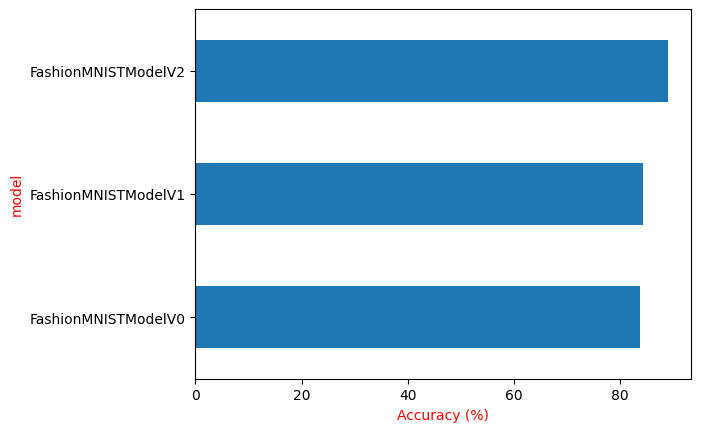

In [52]:
# Visualize our model results
compare_results.set_index("model_name")['model_acc'].plot(kind='barh')
plt.xlabel("Accuracy (%)", color='red')
plt.ylabel("model", color='red');

# 9. Make and evaluate random predictions with the best model

In [53]:
def make_predictions(model: torch.nn.Module,
                    data: list,
                    device: torch.device = device):
    pred_probs = []
    model.to(device)
    model.eval()
    with torch.inference_mode():
        for sample in data:
            #Prepare the sample ( add a batch dimension and pass to target device)
            sample = torch.unsqueeze(sample, dim=0).to(device)

            # Forward pass ()
            pred_logit = model(sample)

            # Get prediction probability (logit -> prediction probability)
            pred_prob = torch.softmax(pred_logit.squeeze(), dim=0)

            # Get pred_prob off the GPU for further calculations
            pred_probs.append(pred_prob.cpu())
    return torch.stack(pred_probs)

In [54]:
import random
# random.seed(42)
test_samples = [] # images in tensor format
test_labels = []
for sample, label in random.sample(list(test_data), k=9):
    test_samples.append(sample)
    test_labels.append(label)
# View the first sample shape
test_samples[1].shape

torch.Size([1, 28, 28])

Text(0.5, 1.0, 'Sandal')

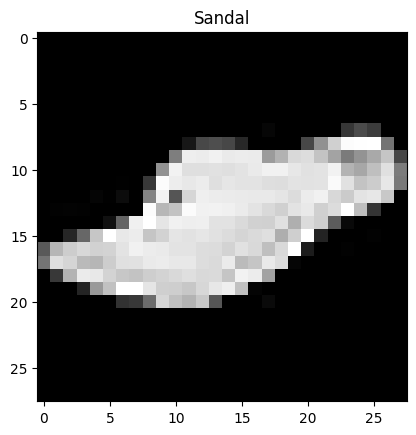

In [55]:
plt.imshow(test_samples[1].squeeze(), cmap='gray')
plt.title(class_names[test_labels[1]])

In [56]:
# Make predictions
pred_probs = make_predictions(model=model_2,
                             data=test_samples)
# View first two prediction probabilities
pred_probs[:2]

tensor([[3.3865e-02, 2.5054e-02, 2.9510e-04, 9.3478e-01, 2.5322e-03, 2.1297e-05,
         2.2480e-03, 1.9091e-04, 7.8869e-04, 2.2555e-04],
        [8.5183e-03, 6.7321e-06, 3.0565e-04, 1.2012e-05, 6.3453e-05, 1.2087e-01,
         4.4505e-03, 2.0028e-01, 8.4105e-02, 5.8139e-01]])

In [57]:
# Convert prediction probabilities to labels
pred_classes = pred_probs.argmax(dim=1)
pred_classes

tensor([3, 9, 9, 4, 2, 7, 8, 2, 0])

In [58]:
test_labels

[3, 5, 9, 6, 2, 7, 8, 2, 0]

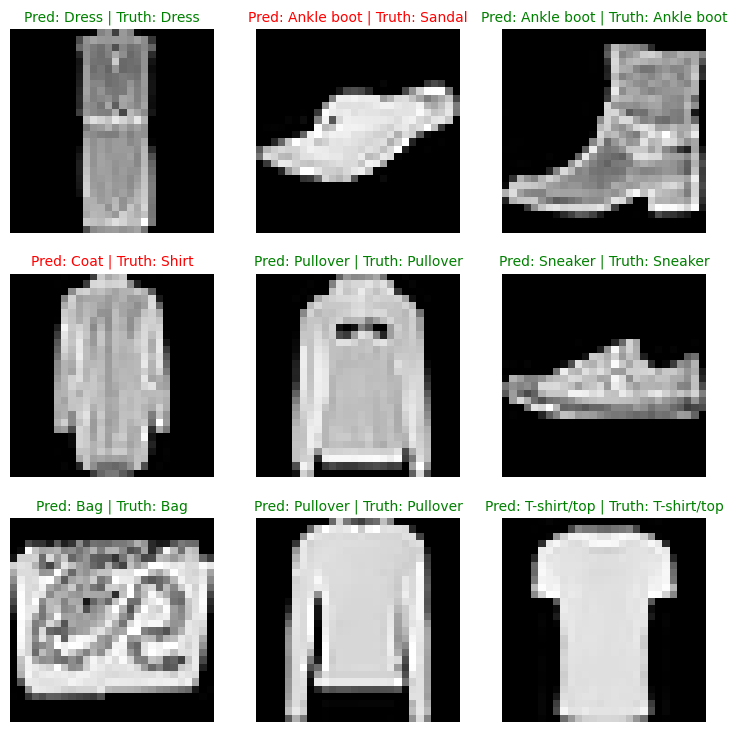

In [59]:
# plot predictions
plt.figure(figsize=(9, 9))
nrows = 3
ncols = 3
for i, sample in enumerate(test_samples):
    # Create subplot
    plt.subplot(nrows, ncols, i +1)

    # Plot the target image
    plt.imshow(sample.squeeze(), cmap='gray')

    # Find the prediction (in text form, e.g "Sandal")
    pred_label = class_names[pred_classes[i]]

    # Get the truth label (in text form)
    truth_label = class_names[test_labels[i]]

    # Create a title for the plot
    title_text = f"Pred: {pred_label} | Truth: {truth_label}"

    # Check for quality between pred and truth and change color of title text
    if pred_label == truth_label:
        plt.title(title_text, fontsize=10, c='g') # green text if prediction same as truth
    else:
        plt.title(title_text, fontsize=10, c='r')
        
    plt.axis(False);

# 10. Making a confusion matrix for futher prediction evaluation
A confusion matrix is a fantastic way of evaluating your classification models visually.
* `torchmetrics.ConfusionMatrix`

In [64]:
from tqdm import tqdm

# 1. Make predictions with trained model
y_preds = []
model_2.eval()
with torch.inference_mode():
    for X, y in tqdm(test_dataloader, desc="Making predictions..."):
        # Send the data and targets to target device
        X, y = X.to(device), y.to(device)
        # Do the forward pass
        y_logit = model_2(X)
        # Turn predictions from logits --> prediction probs --> prediction labels
        y_pred = torch.softmax(y_logit.squeeze(), dim=0).argmax(dim=1)
        #Put prediction on CPU for evaluation
        y_preds.append(y_pred.cpu())

# Concatenate list of predictions into a tensor
# print(y_preds)
y_pred_tensor = torch.cat(y_preds)
y_pred_tensor[:10]

Making predictions...: 100%|████████████████████████████████████████████████████████| 313/313 [00:00<00:00, 379.33it/s]


tensor([9, 2, 1, 1, 6, 1, 4, 6, 5, 7])

In [65]:
len(y_pred_tensor)

10000

In [66]:
# try: 
#     import torchmetrics, mlxtend
#     print(f"mlxtend version: {mlxtend.__version__}")
#     assert int(mlxtend.__version__.split(".")[1] >= 19, "mlxtend version should be 0.19 or higher")
# except:
#     !pip install torchmetrics -U mlxtend
#     import torchmetrics, mlxtend
#     print(f"mlxtend version: {mlxtend.__version__}")

import mlxtend, torchmetrics
mlxtend.__version__, torchmetrics.__version__

('0.23.1', '1.4.1')

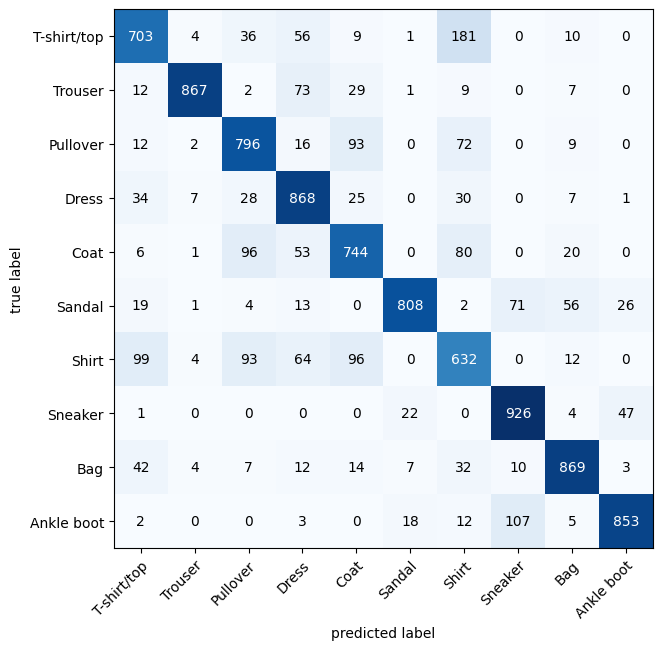

In [70]:
from torchmetrics import ConfusionMatrix
from mlxtend.plotting import plot_confusion_matrix

#. Setup confusion instance and compare prediction to targets
confmat = ConfusionMatrix(task="multiclass", num_classes=len(class_names))
confmat_tensor = confmat(preds=y_pred_tensor,
                        target=test_data.targets)

# 3. Plot confusion matrix
fig, ax = plot_confusion_matrix(
    conf_mat=confmat_tensor.numpy(), # Matplotlib likes working with numpy
    class_names=class_names,
    figsize=(10, 7)
)